#  King county sales

## 1. Introduction

As a consultant, my client, Sunset Real Estate Company, is currently exploring the idea of purchasing properties to remodel either for the purpose selling or renting to prospective clients in King County.

I will analyse the current housing data from King's County to understand better the different factors affecting housing within the county and advice on the best investment strategy.

### Objective
- To build a model that predicts the price of houses with an acceptably high accuracy.
- To identify variables with the most weight when it comes to predicting the highest market price.
- To advice on the best investment strategy

### Columns
- id - unique identified for a house
- date - house was sold
- price - is prediction target
- bedrooms- of Bedrooms/House
- bathrooms- of bathrooms/bedrooms
- sqft_living - footage of the home
- sqft_lot - footage of the lot
- floors - Total floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The avg square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The avg square footage of the land lots of the nearest 15 neighbors

## 2. Exploring Data

### Importing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.feature_selection import RFE

### Load and exploring dataset

In [2]:
#open datatset
df = pd.read_csv('kc_house_data.csv',index_col=0)

In [3]:
#explore the data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Explore shape of the dataframes
df.shape
print('Number of rows =', df.shape[0])
print('Number of columns =', df.shape[1])

Number of rows = 21597
Number of columns = 20


In [5]:
#Get a full overview of the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 3. Data Cleaning

### Checking for Missing Values

In [7]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are alot of NaN values relative to the size of the datset (21597 entries). Dropping the rows i not the most appropriate channel as it would shrink the data.
Exploring the results from the df.describe in cells above, I will replace the Nans with median values.

In [8]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [9]:
df['waterfront'] = df['waterfront'].fillna(df.waterfront.median())
df['yr_renovated'] = df['yr_renovated'].fillna(df.yr_renovated.median())
df['view'] = df['view'].fillna(df.view.median())

### Checking for duplicates

In [10]:
df.duplicated().sum()

0

### Changing data type
From the data information, there are two columns that are strings:

date

sqft_basement

Date is not stored on the right format. I will keep the year as year_sold.

I will convert sqft_basement into a float/integer because it would make it more suitable for analysis. Aditionally the other related columns e.g. sqft_living, sqft_lot are in integer/float so it would make sense to convert it as well.

In [11]:
#I will explore value counts of sqft_basement to understand it better
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
861.0         1
2810.0        1
295.0         1
2250.0        1
2390.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [12]:
# There seems to be '?'
#I will replace '?'
df['sqft_basement'] = [0.0 if value == '?' else value for value in df['sqft_basement']]
#converting to numeric
df["sqft_basement"] = pd.to_numeric(df["sqft_basement"])

In [13]:
df['year_sold'] = pd.to_datetime(df['date']).dt.year
df.drop(columns=['date'], inplace=True, axis = 1)

In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
id,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


### Additional observations

Price column seems to be the price since last sold. This could be an out of date column if it has been a long while since last sold. We should make a 2 features:

age of home

how many years since last sold.

Sqft_living15 seems to be an average of the 15 properties around sqft_lot15 seems to be average of 15 lots around

The data is about houses in zipcodes around Seattle, WA.

The dependent variable is Price and min value is 78000 and max is 7,700,000 and a mean of 540296 and median of 450000.

sq_ft living ranges from 370 to 13540 sf ft.

bedrooms range from 1 to 33 with a mean of 3.37 and median of 3.

sqft_lot range from 520 to 1651359.0 with mean of 15099 and median of 7618.

zipcode-70 zipcodes

grade - grade from kings county grading system 3-13

condition- 1 to 5 with 5 being best

view- has been viewed between 0 - 4 times

waterfront- view of waterfront is 0-1, 1 being yes

In [15]:
df['age_home'] = 2015 - df['yr_built']


df['yrsince_reno'] = [(2015 - val)  if (val !=0.0) else None for val in df['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
df['yrsince_reno'] = df['yrsince_reno'].fillna(df['age_home'])

In [16]:
df.drop(columns=['yr_built', 'yr_renovated'],inplace=True)

In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_home,yrsince_reno
id,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,2014,60,60.0
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,2014,64,24.0
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,2015,82,82.0
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,2014,50,50.0
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,2015,28,28.0


## 3. EDA of data

### Checking for data description

In [18]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_home,yrsince_reno
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,44.000324,42.054869
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619,29.375234,28.945393
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,18.000000,16.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,40.000000,38.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,64.000000,61.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,115.000000,115.000000


### Checking for the distribution of the variables

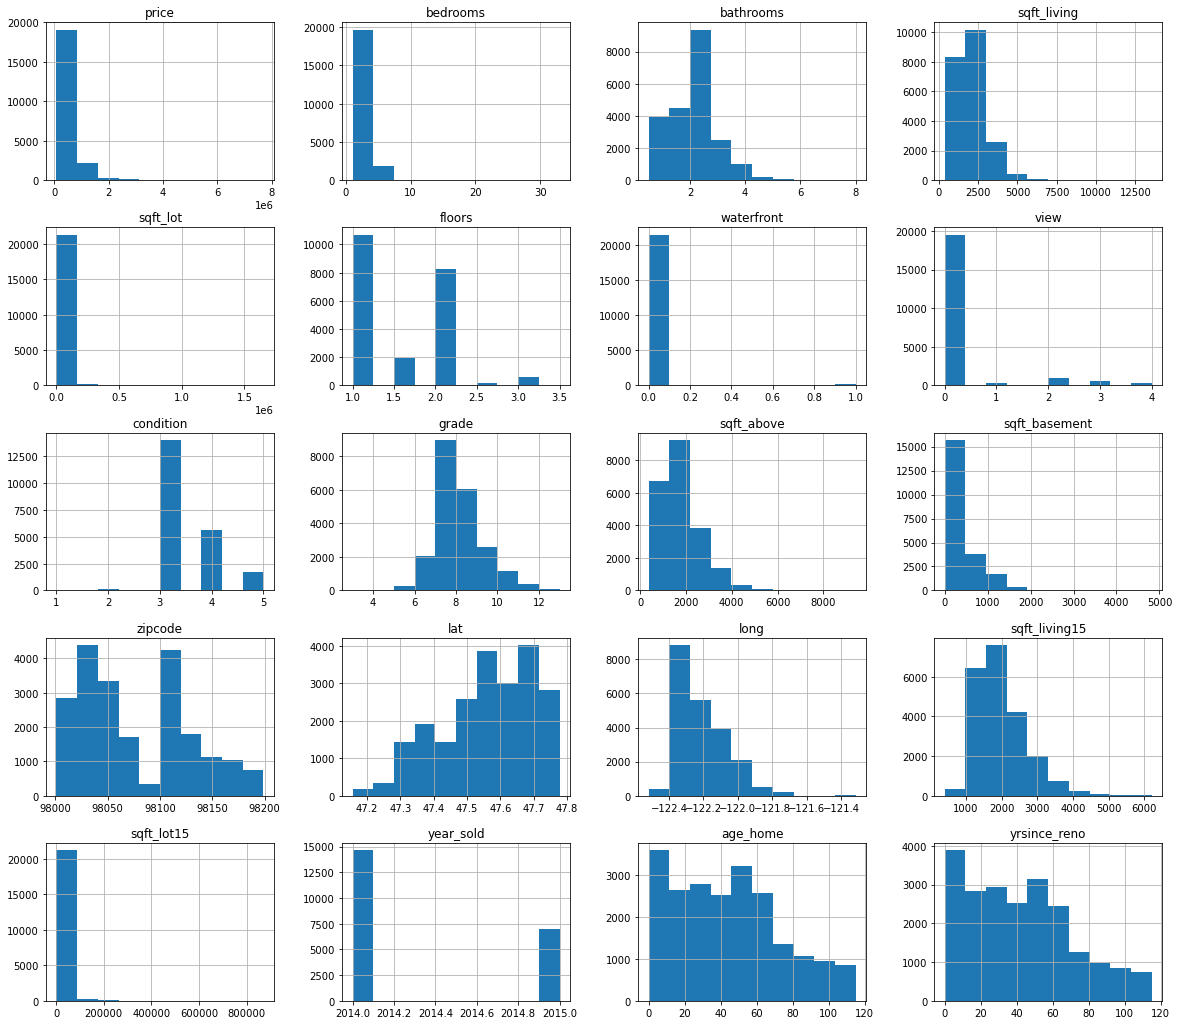

In [19]:
df.hist(figsize = (20,18));

Price looks to be right skewed.

I will check for linearity between different pairs of data with price as the dependent variable using scatter plots.

Most of the data do not seem to be normally distributed

### Checking for linearity

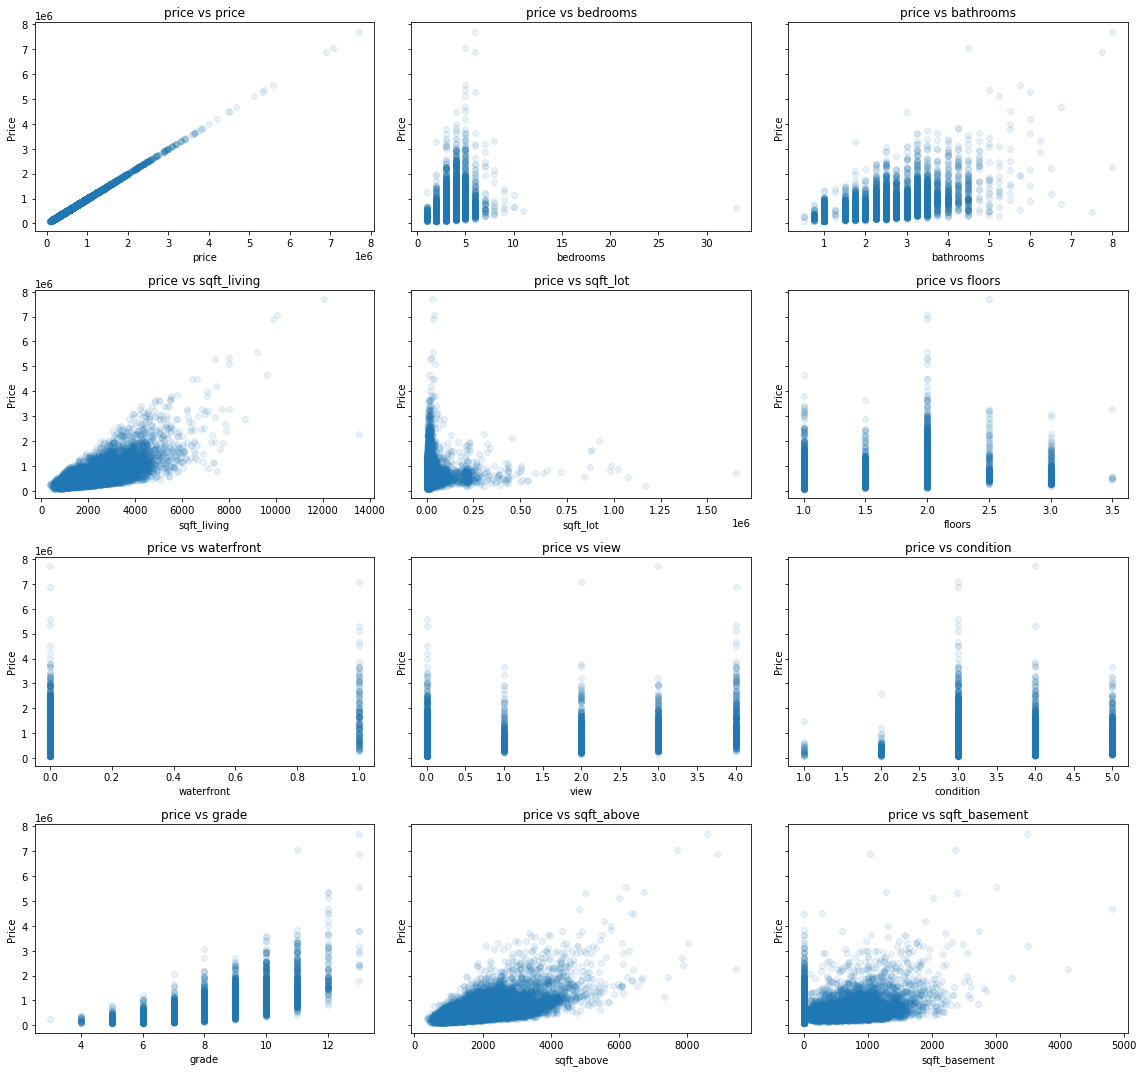

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(),df.columns):
    ax.scatter(df[column], df['price'] , label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')

fig.tight_layout()

There is an outlier of 30+ bedrooms. Note: we should remove the outlier.

### Checking for multicollinearity


I will then check for multicollinearity A pairwise correlations over .75 is a sign of multicolinearity

In [21]:
#create a covariance matrix
corr = df.corr()

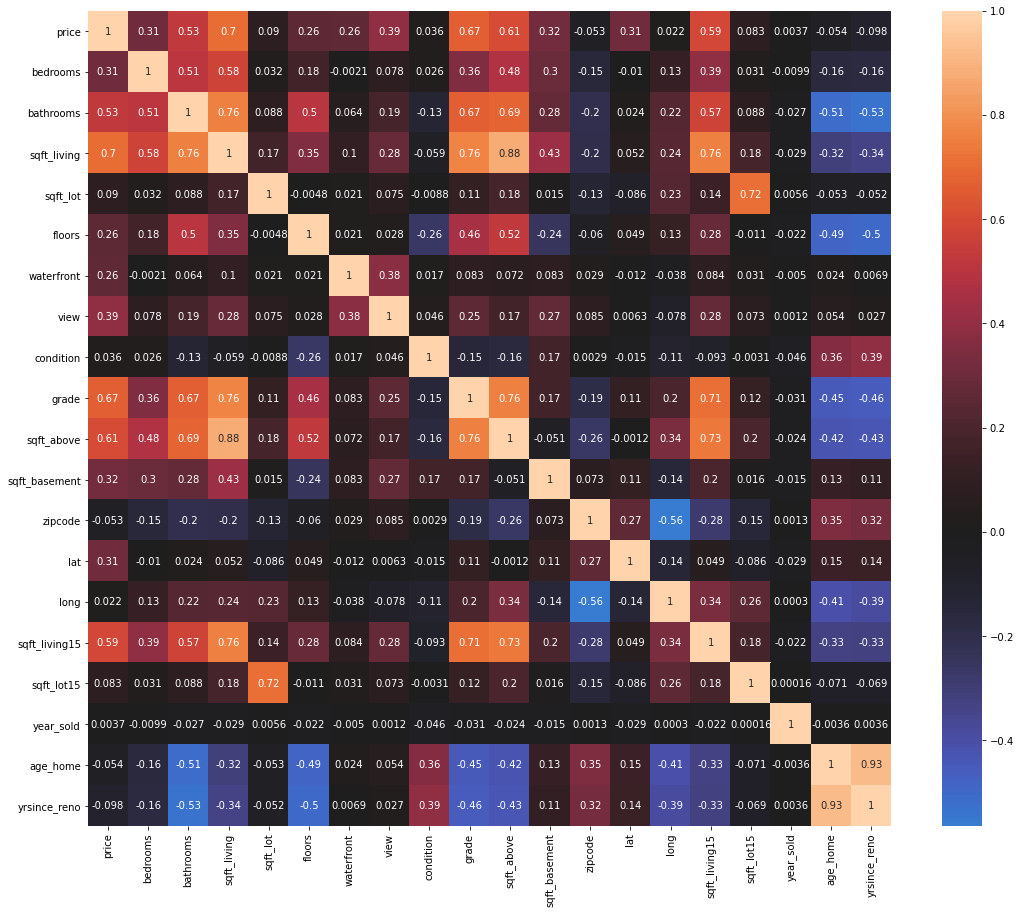

In [22]:
#plotting the covariance matrix on a heatmap
plt.figure(figsize=(18,15))
sns.heatmap(corr, center=0, annot=True);

In [23]:
abs(corr) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_home,yrsince_reno
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


The following variables have a highly correlation with price:

grade

sqft_above

sqft_living15

sqft_living

bathrooms


In [24]:
#Dropping some columns to fix the problem of muticollinearity.
df = df.drop(columns=['sqft_living15', 'sqft_above', 'grade','bathrooms']).copy()
df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,zipcode,lat,long,sqft_lot15,year_sold,age_home,yrsince_reno
id,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1180,5650,1.0,0.0,0.0,3,0.0,98178,47.5112,-122.257,5650,2014,60,60.0
6414100192,538000.0,3,2570,7242,2.0,0.0,0.0,3,400.0,98125,47.7210,-122.319,7639,2014,64,24.0
5631500400,180000.0,2,770,10000,1.0,0.0,0.0,3,0.0,98028,47.7379,-122.233,8062,2015,82,82.0
2487200875,604000.0,4,1960,5000,1.0,0.0,0.0,5,910.0,98136,47.5208,-122.393,5000,2014,50,50.0
1954400510,510000.0,3,1680,8080,1.0,0.0,0.0,3,0.0,98074,47.6168,-122.045,7503,2015,28,28.0


## 4. Data Modelling

### Model One 

Baseline Model

In [25]:
outcome = 'price'
prediction_df = df.drop(['price', ], axis = 1)
prediction_variables = "+".join(prediction_df.columns)
formula = outcome + '~' + prediction_variables

In [26]:
prediction_variables

'bedrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+sqft_basement+zipcode+lat+long+sqft_lot15+year_sold+age_home+yrsince_reno'

In [27]:
formula

'price~bedrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+sqft_basement+zipcode+lat+long+sqft_lot15+year_sold+age_home+yrsince_reno'

In [28]:
baseline_model = ols(formula = formula, data = df).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2841.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:47:16   Log-Likelihood:            -2.9562e+05
No. Observations:               21597   AIC:                         5.913e+05
Df Residuals:                   21581   BIC:                         5.914e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.585e+07   6.95e+06     -8.036      0.000   -6.95e+07   -4.22e+07
bedrooms      -4.405e+04   1958.456    -22.490      0.000   -4.79e+04   -4.02e+04
sqft_living     304.2869      2.570    118.405      0.000     299.250     309.324
sqft_lot          0.1206      0.051      2.383      0.017       0.021       0.220
floors         3.273e+04   3627.619      9.024      0.000    2.56e+04    3.98e+04
waterfront     5.925e+05   1.92e+04     30.913      0.000    5.55e+05     6.3e+05
view            6.96e+04   2195.938     31.693      0.000    6.53e+04    7.39e+04
condition      3.139e+04   2484.551     12.634      0.000    2.65e+04    3.63e+04
sqft_basement   -61.4730      4.406    -13.951      0.000     -70.110     -52.836
zipcode        -722.8355     34.686    -20.839      0.000    -790.823    -654.848
lat            7.096e+05   1.12e+04     63.634      0.000    6.88e+05    7.31e+05
long          -2.852e+05   1.36e+04    -20.897      0.000   -3.12e+05   -2.58e+05
sqft_lot15       -0.4400      0.078     -5.675      0.000      -0.592      -0.288
year_sold      2.878e+04   3108.850      9.259      0.000    2.27e+04    3.49e+04
age_home       2620.3944    134.124     19.537      0.000    2357.502    2883.287
yrsince_reno  -1182.9474    137.093     -8.629      0.000   -1451.660    -914.235
==============================================================================
Omnibus:                    15465.241   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           874965.913
Skew:                           2.863   Prob(JB):                         0.00
Kurtosis:                      33.652   Cond. No.                     4.82e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation from the baseline model:

Bedrooms have a negative coefficient. This means that as the bedrooms increase, the price decreases.

Zipcode has a negative coefficent. There is a need to review how to look into getting location data in the model

sqft_lot15 has a neg coef






In [29]:
X = prediction_df
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [30]:
baseline_linreg = LinearRegression()
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = baseline_linreg.predict(X_test)
residuals = y_pred - y_test
X.columns

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_lot15',
       'year_sold', 'age_home', 'yrsince_reno'],
      dtype='object')

In [32]:
baseline_linreg.coef_

array([-4.80845651e+04,  3.05012790e+02,  1.32453277e-01,  3.62543110e+04,
        5.71312807e+05,  7.05084325e+04,  2.91180395e+04, -5.73123175e+01,
       -7.48473759e+02,  7.11225654e+05, -2.80182672e+05, -4.42331418e-01,
        3.11428272e+04,  2.56350956e+03, -1.10266617e+03])

In [33]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 212125.28563438373
Test RMSE: 215727.58296804444


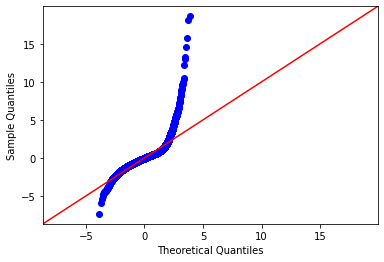

In [34]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

### Model 2
Dealing with outliers

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.233181,0.764673,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
sqft_basement,21597.0,285.716581,439.819830,0.0000,0.0000,0.0000,550.000,4.820000e+03
zipcode,21597.0,98077.951845,53.513072,98001.0000,98033.0000,98065.0000,98118.000,9.819900e+04


In [36]:
df.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_basement', 'zipcode', 'lat', 'long',
       'sqft_lot15', 'year_sold', 'age_home', 'yrsince_reno'],
      dtype='object')

In [37]:
#In a normal distribution 99% or all data falls within a z score of under 3.
#Clean outliers where z score is > 3
#not cleaning zscore outliers where negative as smaller is good.
z = stats.zscore(df)
print(z)

[[-0.86671627 -0.40290302 -0.98065209 ... -0.69066702  0.54467809
   0.61997937]
 [-0.00625157 -0.40290302  0.53336915 ... -0.69066702  0.68085037
  -0.62377064]
 [-0.98077344 -1.48249316 -1.4272339  ...  1.44787571  1.29362563
   1.38004882]
 ...
 [-0.37618606 -1.48249316 -1.15492792 ... -0.69066702 -1.29364769
  -1.24564565]
 [-0.38190525 -0.40290302 -0.52317805 ...  1.44787571 -1.12343234
  -1.07290259]
 [-0.58606486 -1.48249316 -1.15492792 ... -0.69066702 -1.25960462
  -1.21109704]]


In [38]:
threshold = 3.0
print(np.where(z > threshold))

(array([    5,     5,    10, ..., 21560, 21574, 21574]), array([ 2, 12,  8, ...,  6,  2,  8]))


In [39]:
df_out = df[(z < 3).all(axis=1)]

In [40]:
len(df_out)

19662

In [41]:
#Removed 9% of values with z score > 3
1935/21597

0.08959577719127657

In [42]:
df_out.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,19662.0,489759.462110,241616.312684,78000.0000,315000.000000,436500.0000,607500.000000,1.640000e+06
bedrooms,19662.0,3.332164,0.861134,1.0000,3.000000,3.0000,4.000000,6.000000e+00
sqft_living,19662.0,1970.383379,766.008049,370.0000,1400.000000,1850.0000,2430.000000,4.820000e+03
sqft_lot,19662.0,9964.199217,11686.180356,520.0000,5000.000000,7372.0000,9958.750000,1.372140e+05
floors,19662.0,1.484691,0.538479,1.0000,1.000000,1.0000,2.000000,3.000000e+00
waterfront,19662.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000e+00
view,19662.0,0.096837,0.411771,0.0000,0.000000,0.0000,0.000000,2.000000e+00
condition,19662.0,3.408809,0.648873,1.0000,3.000000,3.0000,4.000000,5.000000e+00
sqft_basement,19662.0,252.829977,387.201909,0.0000,0.000000,0.0000,500.000000,1.600000e+03
zipcode,19662.0,98078.865578,53.343540,98001.0000,98033.000000,98072.0000,98118.000000,9.819900e+04


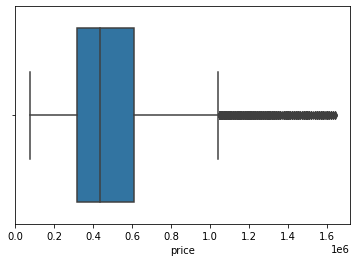

In [43]:
sns.boxplot(x=df_out.price);

In [44]:
df_out.shape

(19662, 16)

In [45]:
outcome = 'price'
prediction = df_out.drop(columns = ['price'], axis = 1)
prediction_variables = "+".join(prediction.columns)
formula = outcome + '~' + prediction_variables

In [46]:
model_2 = ols(formula = formula, data = df_out).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     2312.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:47:16   Log-Likelihood:            -2.6204e+05
No. Observations:               19662   AIC:                         5.241e+05
Df Residuals:                   19647   BIC:                         5.242e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.827e+07   5.09e+06     -9.482      0.000   -5.82e+07   -3.83e+07
bedrooms      -2.614e+04   1580.088    -16.544      0.000   -2.92e+04    -2.3e+04
sqft_living     225.6039      2.247    100.381      0.000     221.199     230.009
sqft_lot          0.1033      0.158      0.653      0.514      -0.207       0.413
floors         4.656e+04   2741.438     16.983      0.000    4.12e+04    5.19e+04
waterfront        0.0009   9.39e-05      9.482      0.000       0.001       0.001
view           6.006e+04   2642.462     22.729      0.000    5.49e+04    6.52e+04
condition      2.972e+04   1818.739     16.341      0.000    2.62e+04    3.33e+04
sqft_basement   -41.8128      3.509    -11.916      0.000     -48.691     -34.935
zipcode        -509.7487     25.664    -19.863      0.000    -560.052    -459.446
lat            6.732e+05   8102.750     83.081      0.000    6.57e+05    6.89e+05
long           -1.68e+05   1.13e+04    -14.869      0.000    -1.9e+05   -1.46e+05
sqft_lot15       -0.5251      0.204     -2.578      0.010      -0.924      -0.126
year_sold      2.265e+04   2269.991      9.979      0.000    1.82e+04    2.71e+04
age_home       2101.4596    102.698     20.462      0.000    1900.163    2302.757
yrsince_reno   -947.9518    104.457     -9.075      0.000   -1152.697    -743.206
==============================================================================
Omnibus:                     4503.620   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17265.351
Skew:                           1.104   Prob(JB):                         0.00
Kurtosis:                       7.025   Cond. No.                     4.43e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.84e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Interpretation from model 2:

Sqft_Basement is no a longer relevant feature.

We most probably will need to drop it in the next model

In [47]:
X = df_out.drop("price", axis = 1)
y = df_out['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [48]:
print(len(X_train))
print(len(X_test))

14746
4916


In [49]:
model2_linreg = LinearRegression()
model2_linreg.fit(X_train, y_train)
y_pred = model2_linreg.predict(X_test)
residuals = y_pred - y_test

In [50]:
model2_linreg.coef_

array([-2.55424140e+04,  2.23892455e+02,  9.01865886e-02,  4.52196652e+04,
       -3.70027919e-09,  6.32359081e+04,  2.95089091e+04, -4.30387807e+01,
       -5.00570429e+02,  6.70807464e+05, -1.60720252e+05, -4.98924629e-01,
        2.28779994e+04,  2.00674192e+03, -8.70854580e+02])

In [51]:
mse_train = mean_squared_error(y_train, model2_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 148427.907655285
Test RMSE: 148706.2876259561


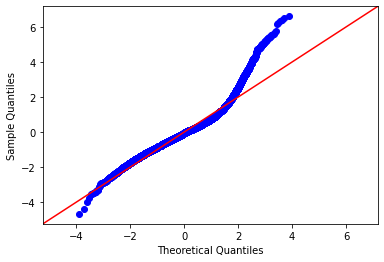

In [52]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

### Model Three

Fixing  Categorical Features

In [53]:
df_out.condition.unique()

array([3, 5, 4, 1, 2])

In [54]:
df_out.view.unique()

array([0., 2., 1.])

In [55]:
df_out.waterfront.unique()

array([0.])

In [56]:
print(df_out.condition.unique())
print(df_out.view.unique())
print(df_out.waterfront.unique())

[3 5 4 1 2]
[0. 2. 1.]
[0.]


In [57]:
condition_dummies = pd.get_dummies(df_out['condition'], prefix = 'cond', drop_first= True)

In [58]:
view_dummies = pd.get_dummies(df_out['view'], prefix = 'view', drop_first= True)

In [59]:
waterfront_dummies = pd.get_dummies(df_out['waterfront'], prefix = 'waterfront', drop_first= True)

In [60]:
df_dum = pd.concat([df_out,condition_dummies, view_dummies, waterfront_dummies], axis =1 )

In [61]:
df_dum.rename(columns={"view_1.0": "view_1", "view_2.0": "view_2", "view_3.0": "view_3",
                       "view_4.0": "view_4"}, inplace=True)

In [62]:
df_dum

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,zipcode,...,sqft_lot15,year_sold,age_home,yrsince_reno,cond_2,cond_3,cond_4,cond_5,view_1,view_2
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1180,5650,1.0,0.0,0.0,3,0.0,98178,...,5650,2014,60,60.0,0,1,0,0,0,0
6414100192,538000.0,3,2570,7242,2.0,0.0,0.0,3,400.0,98125,...,7639,2014,64,24.0,0,1,0,0,0,0
5631500400,180000.0,2,770,10000,1.0,0.0,0.0,3,0.0,98028,...,8062,2015,82,82.0,0,1,0,0,0,0
2487200875,604000.0,4,1960,5000,1.0,0.0,0.0,5,910.0,98136,...,5000,2014,50,50.0,0,0,0,1,0,0
1954400510,510000.0,3,1680,8080,1.0,0.0,0.0,3,0.0,98074,...,7503,2015,28,28.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,1530,1131,3.0,0.0,0.0,3,0.0,98103,...,1509,2014,6,6.0,0,1,0,0,0,0
6600060120,400000.0,4,2310,5813,2.0,0.0,0.0,3,0.0,98146,...,7200,2015,1,1.0,0,1,0,0,0,0
1523300141,402101.0,2,1020,1350,2.0,0.0,0.0,3,0.0,98144,...,2007,2014,6,6.0,0,1,0,0,0,0


In [63]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 7129300520 to 1523300157
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19662 non-null  float64
 1   bedrooms       19662 non-null  int64  
 2   sqft_living    19662 non-null  int64  
 3   sqft_lot       19662 non-null  int64  
 4   floors         19662 non-null  float64
 5   waterfront     19662 non-null  float64
 6   view           19662 non-null  float64
 7   condition      19662 non-null  int64  
 8   sqft_basement  19662 non-null  float64
 9   zipcode        19662 non-null  int64  
 10  lat            19662 non-null  float64
 11  long           19662 non-null  float64
 12  sqft_lot15     19662 non-null  int64  
 13  year_sold      19662 non-null  int64  
 14  age_home       19662 non-null  int64  
 15  yrsince_reno   19662 non-null  float64
 16  cond_2         19662 non-null  uint8  
 17  cond_3         19662 non-null  uint8

In [64]:
df_dum.drop(columns=['condition', 'view', 'waterfront','sqft_basement',], inplace = True)

In [65]:
df_dum.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
       'lat', 'long', 'sqft_lot15', 'year_sold', 'age_home', 'yrsince_reno',
       'cond_2', 'cond_3', 'cond_4', 'cond_5', 'view_1', 'view_2'],
      dtype='object')

In [66]:
outcome = 'price'
prediction = df_dum.drop(columns = ['price'], axis = 1)
prediction_variables = "+".join(prediction.columns)
formula = outcome + '~' + prediction_variables

In [67]:
model_3 = ols(formula = formula, data = df_dum).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1890.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:47:16   Log-Likelihood:            -2.6208e+05
No. Observations:               19662   AIC:                         5.242e+05
Df Residuals:                   19644   BIC:                         5.243e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -4.278e+07   5.09e+06     -8.404      0.000   -5.28e+07   -3.28e+07
bedrooms     -2.705e+04   1581.213    -17.107      0.000   -3.01e+04    -2.4e+04
sqft_living    213.3435      2.043    104.412      0.000     209.339     217.349
sqft_lot         0.1302      0.159      0.820      0.412      -0.181       0.441
floors        6.095e+04   2484.100     24.536      0.000    5.61e+04    6.58e+04
zipcode       -525.9072     25.831    -20.360      0.000    -576.538    -475.277
lat           6.644e+05   8099.315     82.027      0.000    6.48e+05     6.8e+05
long         -1.384e+05   1.11e+04    -12.465      0.000    -1.6e+05   -1.17e+05
sqft_lot15      -0.3811      0.204     -1.867      0.062      -0.781       0.019
year_sold     2.273e+04   2275.959      9.988      0.000    1.83e+04    2.72e+04
age_home      2065.0760    102.923     20.064      0.000    1863.339    2266.813
yrsince_reno  -885.1539    104.927     -8.436      0.000   -1090.820    -679.487
cond_2        1.862e+04   3.16e+04      0.588      0.556   -4.34e+04    8.06e+04
cond_3        4.597e+04   2.93e+04      1.567      0.117   -1.15e+04    1.03e+05
cond_4        6.994e+04   2.93e+04      2.385      0.017    1.25e+04    1.27e+05
cond_5         1.05e+05   2.95e+04      3.560      0.000    4.72e+04    1.63e+05
view_1        1.159e+05   8891.070     13.038      0.000    9.85e+04    1.33e+05
view_2        1.065e+05   5459.317     19.516      0.000    9.58e+04    1.17e+05
==============================================================================
Omnibus:                     4536.571   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17569.086
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       7.066   Cond. No.                     4.75e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
X = df_dum.drop("price", axis = 1)
y = df_dum['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [69]:
print(len(X_train))
print(len(X_test))

14746
4916


In [70]:
model3_linreg = LinearRegression()
model3_linreg.fit(X_train, y_train)
y_pred = model3_linreg.predict(X_test)
residuals = y_pred - y_test

In [71]:
model3_linreg.coef_

array([-2.65137687e+04,  2.11198297e+02,  1.04355307e-01,  6.00335330e+04,
       -5.18848201e+02,  6.62013802e+05, -1.29860981e+05, -3.39003912e-01,
        2.28687927e+04,  1.97537804e+03, -8.07422541e+02, -1.56235757e+04,
        2.49181948e+04,  4.73850793e+04,  8.38414439e+04,  1.24005197e+05,
        1.12227159e+05])

In [72]:
mse_train = mean_squared_error(y_train, model3_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 148758.63969007245
Test RMSE: 149128.8755220414


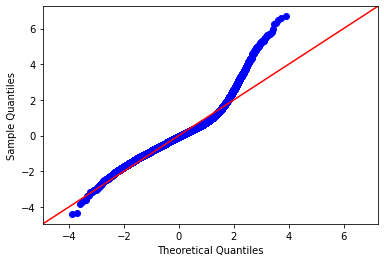

In [73]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [74]:
def plot_brms(ax, brms):
    col = 'sqft_living'
    x = np.linspace(5.9, 8.5)
    
    is_in = df_dum.loc[df_dum['bedrooms'] == brms, [col, 'price']]
    linreg = LinearRegression()
    linreg.fit(np.log(is_in[[col]]), np.log(is_in['price']))
    preds = linreg.predict(np.log(is_in[[col]]))
    ax.scatter(np.log(is_in[[col]]), np.log(is_in['price']), alpha=.3, label=None)

    coef = f'{linreg.coef_[0]:.2f}'
    label = "Bedrooms_is {} : {}:".format(brms, coef)
    return ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=label)

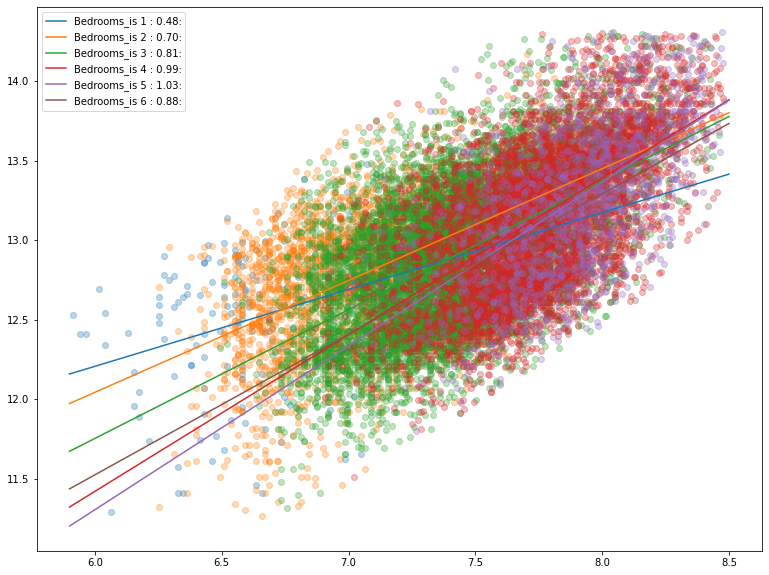

In [75]:
##Understanding negative correlation of bedrooms
# Visualization code here
fig, ax = plt.subplots(figsize=(13, 10))

for i in range(1,7):
    plot_brms(ax, i)

ax.legend()
plt.show()

In [76]:
df_dum.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
       'lat', 'long', 'sqft_lot15', 'year_sold', 'age_home', 'yrsince_reno',
       'cond_2', 'cond_3', 'cond_4', 'cond_5', 'view_1', 'view_2'],
      dtype='object')

In [77]:
try:
    bedrooms_df = df_dum.drop(columns=['sqft_lot', 'floors', 'age',
        'yrsince_reno', 'zipcode', 'lat', 'long',
        'sqft_lot15', 'cond_2', 'cond_3', 'cond_4', 'cond_5',
        'view_1', 'view_2', 'log_price', 'log_sqft_living',
       'log_sqft_lot', 'log_sqft_living15', 'log_sqft_lot15',])
except:
    bedrooms_df = df_dum

In [78]:
bedrooms_df['price_per_bedroom'] = bedrooms_df['price']/bedrooms_df['bedrooms']
bedrooms_df['price_per_sqft'] = bedrooms_df['price']/bedrooms_df['sqft_living']

In [79]:
br_group = bedrooms_df.groupby(by='bedrooms').mean()
br_group[['price','price_per_bedroom','sqft_living','price_per_sqft']]

,price,price_per_bedroom,sqft_living,price_per_sqft
bedrooms,,,,
1,307318.977528,307318.977528,861.730337,382.103816
2,388402.121596,194201.060798,1209.091676,331.700333
3,444138.729730,148046.243243,1758.497429,257.174246
4,569560.630772,142390.157693,2432.675492,234.508597
5,635284.635135,127056.927027,2773.879880,228.696853
6,610103.316038,101683.886006,2841.886792,216.634136


In [80]:
br_group.head()

,price,sqft_living,sqft_lot,floors,zipcode,lat,long,sqft_lot15,year_sold,age_home,yrsince_reno,cond_2,cond_3,cond_4,cond_5,view_1,view_2,price_per_bedroom,price_per_sqft
bedrooms,,,,,,,,,,,,,,,,,,,
1,307318.977528,861.730337,9061.904494,1.143258,98106.983146,47.570665,-122.281865,8299.876404,2014.280899,73.359551,69.696629,0.056180,0.634831,0.235955,0.056180,0.011236,0.028090,307318.977528,382.103816
2,388402.121596,1209.091676,6931.038742,1.302071,98107.924434,47.592971,-122.286434,6455.422708,2014.334868,59.872651,58.185654,0.017261,0.651323,0.255850,0.071730,0.015727,0.033372,194201.060798,331.700333
3,444138.729730,1758.497429,9640.140387,1.446329,98076.865631,47.553908,-122.222153,9040.444250,2014.326950,43.374002,41.789911,0.006784,0.640333,0.276398,0.075610,0.012474,0.036437,148046.243243,257.174246
4,569560.630772,2432.675492,11396.826929,1.611317,98069.947207,47.555630,-122.193478,10377.264127,2014.315628,38.554730,36.763804,0.004843,0.666613,0.245076,0.082822,0.017113,0.045366,142390.157693,234.508597
5,635284.635135,2773.879880,11364.251502,1.552177,98073.301802,47.571397,-122.205893,10136.120871,2014.322823,41.457207,39.536787,0.000751,0.644895,0.268018,0.086336,0.018769,0.064565,127056.927027,228.696853


In [81]:
bedrooms_df.bedrooms.value_counts()

3    9139
4    6194
2    2607
5    1332
6     212
1     178
Name: bedrooms, dtype: int64

### Model 4

Transformations

In [82]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              19662 non-null  float64
 1   bedrooms           19662 non-null  int64  
 2   sqft_living        19662 non-null  int64  
 3   sqft_lot           19662 non-null  int64  
 4   floors             19662 non-null  float64
 5   zipcode            19662 non-null  int64  
 6   lat                19662 non-null  float64
 7   long               19662 non-null  float64
 8   sqft_lot15         19662 non-null  int64  
 9   year_sold          19662 non-null  int64  
 10  age_home           19662 non-null  int64  
 11  yrsince_reno       19662 non-null  float64
 12  cond_2             19662 non-null  uint8  
 13  cond_3             19662 non-null  uint8  
 14  cond_4             19662 non-null  uint8  
 15  cond_5             19662 non-null  uint8  
 16  view_1  

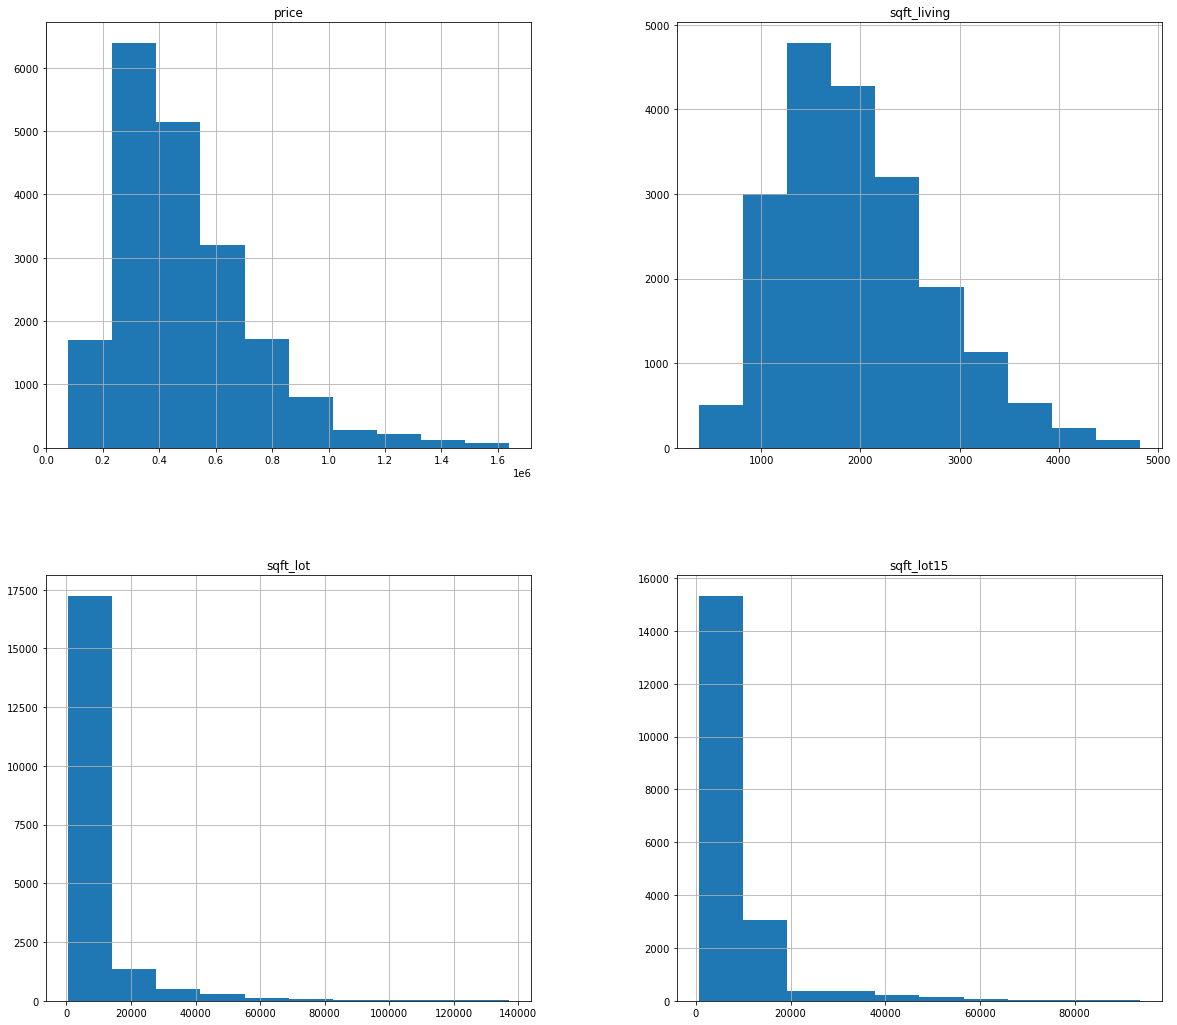

In [83]:
df_dum[['price', 'sqft_living', 'sqft_lot', 'sqft_lot15']].hist(figsize = (20,18));

plt.show()

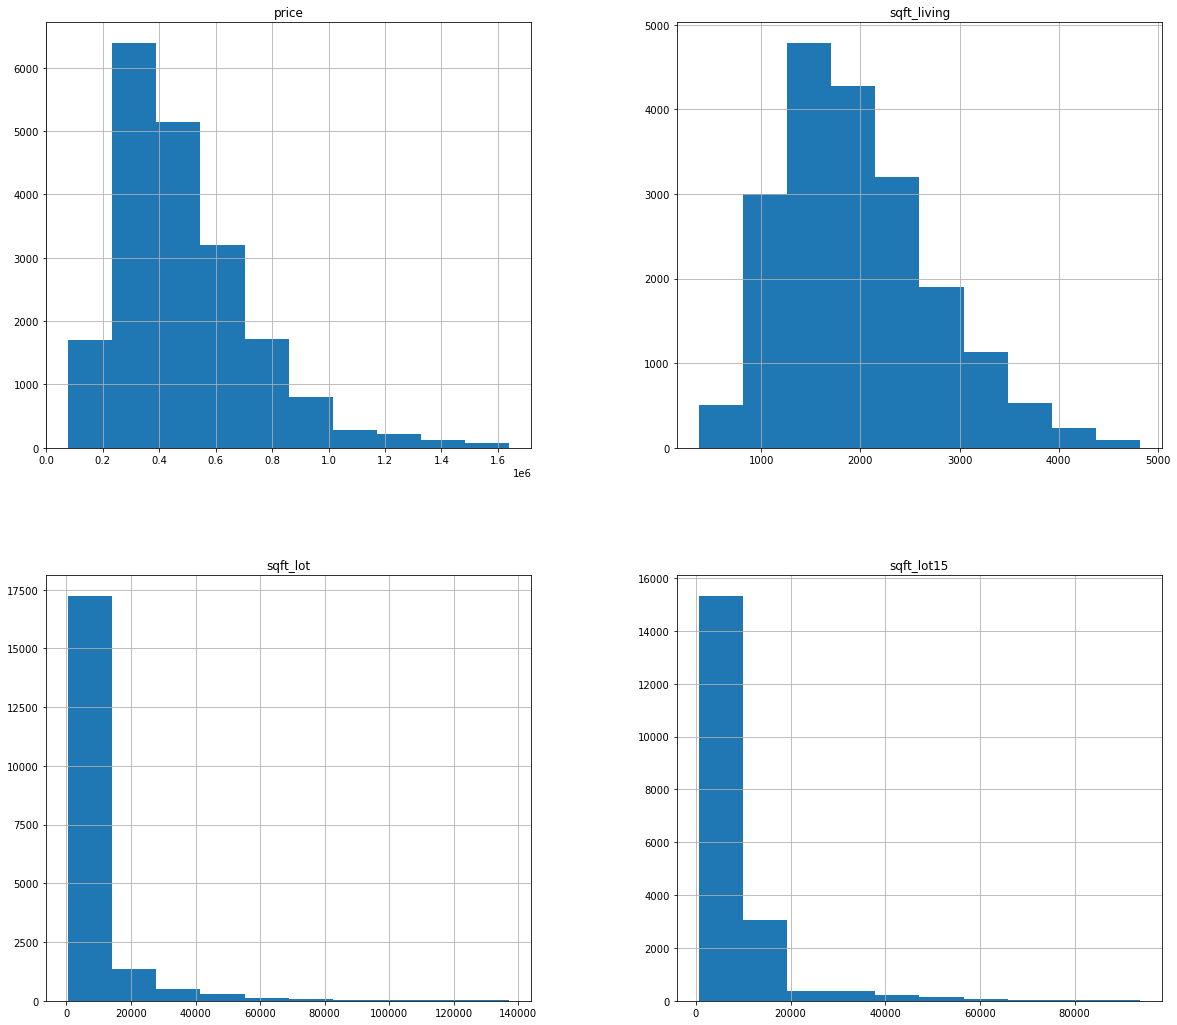

In [84]:
df_dum[['price', 'sqft_living', 'sqft_lot', 'sqft_lot15']].hist(figsize = (20,18));

plt.show()

In [85]:
def transform_cols(cols):
    
    for col in cols:
        newcol = 'log_'+col
        df_dum[newcol] = np.log(df_dum[col])

In [86]:
cols=['price','sqft_living','sqft_lot', 'sqft_lot15']
transform_cols(cols)

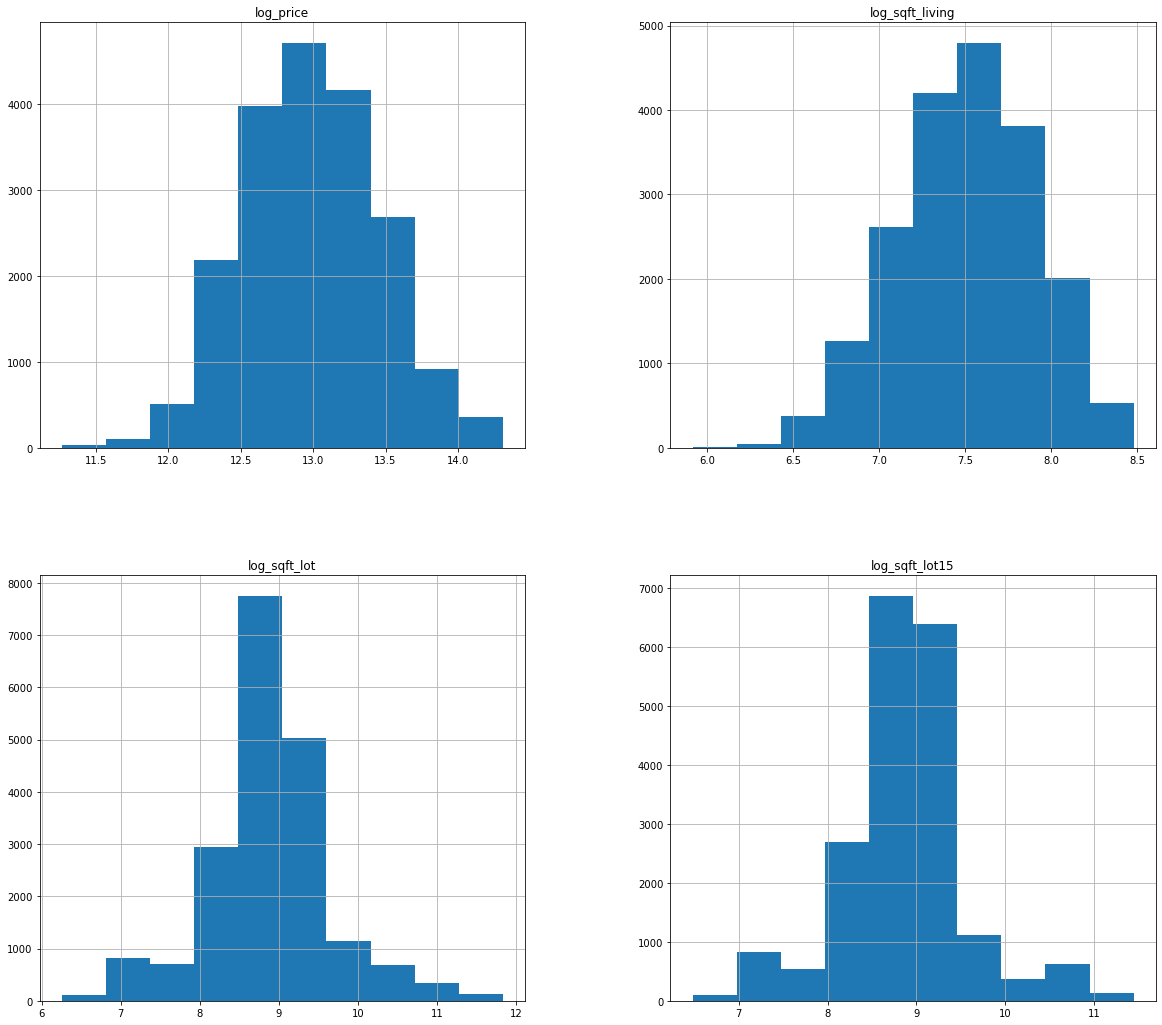

In [87]:
df_dum[['log_price','log_sqft_living', 'log_sqft_lot', 'log_sqft_lot15']].hist(figsize = (20,18));
plt.show()

In [88]:
df_log = df_dum.drop(columns = ['price',
                                           'sqft_living', 
                                           'sqft_lot',  
                                           'sqft_lot15',  
                                          ], axis = 1)

In [89]:
df_log = df_log.drop(columns = ['price_per_bedroom',
                                           'price_per_sqft', 
                                           
                                          ],axis=1)

In [90]:
outcome = 'log_price'
prediction = df_log.drop(columns = ['log_price'], axis = 1)
prediction_variables = "+".join(prediction.columns)
formula = outcome + '~' + prediction_variables

In [91]:
model_4 = ols(formula = formula, data = df_log).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     2299.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:47:18   Log-Likelihood:                -2306.2
No. Observations:               19662   AIC:                             4648.
Df Residuals:                   19644   BIC:                             4790.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -86.5186      9.359     -9.244      0.000    -104.863     -68.174
bedrooms           -0.0489      0.003    -16.404      0.000      -0.055      -0.043
floors              0.1146      0.005     23.330      0.000       0.105       0.124
zipcode            -0.0009   4.73e-05    -17.989      0.000      -0.001      -0.001
lat                 1.5993      0.015    107.511      0.000       1.570       1.628
long               -0.0695      0.021     -3.374      0.001      -0.110      -0.029
year_sold           0.0460      0.004     11.047      0.000       0.038       0.054
age_home            0.0035      0.000     18.543      0.000       0.003       0.004
yrsince_reno       -0.0014      0.000     -7.332      0.000      -0.002      -0.001
cond_2              0.0897      0.058      1.550      0.121      -0.024       0.203
cond_3              0.2152      0.054      4.011      0.000       0.110       0.320
cond_4              0.2625      0.054      4.893      0.000       0.157       0.368
cond_5              0.3211      0.054      5.950      0.000       0.215       0.427
view_1              0.2238      0.016     13.766      0.000       0.192       0.256
view_2              0.2075      0.010     20.830      0.000       0.188       0.227
log_sqft_living     0.7714      0.008     99.704      0.000       0.756       0.787
log_sqft_lot       -0.0193      0.007     -2.966      0.003      -0.032      -0.007
log_sqft_lot15     -0.0123      0.007     -1.752      0.080      -0.026       0.001
==============================================================================
Omnibus:                      127.135   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.433
Skew:                           0.026   Prob(JB):                     4.45e-42
Kurtosis:                       3.479   Cond. No.                     4.73e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Intepratation of Model 4

log_sqft_lot is no longer relevant

yrsince_reno is no longer relevant

long is no longer relevant which goes hand in hand with lat




In [92]:
df_log = df_log.drop(columns = ['log_sqft_lot', 'long', 'lat', 'yrsince_reno' ], axis = 1,)
df_log.reset_index(inplace=True)

In [93]:
X = df_log.drop("log_price", axis = 1)
y = df_log['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [94]:
model4_linreg = LinearRegression()
model4_linreg.fit(X_train, y_train)
y_pred = model4_linreg.predict(X_test)
residuals = y_pred - y_test

In [95]:
model4_linreg.coef_

array([-1.04164268e-12, -7.09140996e-02,  1.35589556e-01,  1.77333507e-04,
        3.78022946e-02,  3.69876891e-03, -3.24729142e-02,  1.83338995e-01,
        1.98864699e-01,  2.57956557e-01,  2.18576303e-01,  1.74928419e-01,
        8.88666790e-01, -6.04513041e-02])

In [96]:
mse_train = mean_squared_error(y_train, model4_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.3428355293070858
Test RMSE: 0.3457897118184483


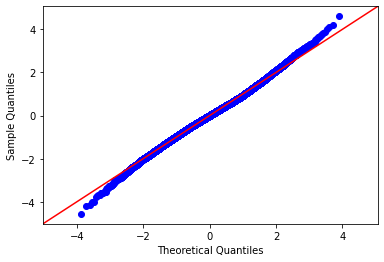

In [97]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

### Model 5

Zipcode Dummies

In [98]:
zipcode_dummies = pd.get_dummies(df_log['zipcode'], prefix = 'zip', drop_first= True)

In [99]:
df_log = pd.concat([df_log,zipcode_dummies], axis =1 )

In [100]:
df_log = df_log.drop(columns = ['zipcode', 'floors'], axis = 1,)

In [101]:
outcome = 'log_price'
prediction = df_log.drop(columns = ['log_price'], axis = 1)
prediction_variables = "+".join(prediction.columns)
formula = outcome + '~' + prediction_variables

In [102]:
model_5 = ols(formula = formula, data = df_log).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1236.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:47:18   Log-Likelihood:                 4723.8
No. Observations:               19662   AIC:                            -9284.
Df Residuals:                   19580   BIC:                            -8637.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -96.0987      5.883    -16.334      0.000    -107.630     -84.567
id               1.055e-12   4.94e-13      2.138      0.033    8.77e-14    2.02e-12
bedrooms           -0.0238      0.002    -11.226      0.000      -0.028      -0.020
year_sold           0.0511      0.003     17.506      0.000       0.045       0.057
age_home           -0.0008   6.72e-05    -12.594      0.000      -0.001      -0.001
cond_2              0.1256      0.041      3.093      0.002       0.046       0.205
cond_3              0.2674      0.038      7.105      0.000       0.194       0.341
cond_4              0.2806      0.038      7.454      0.000       0.207       0.354
cond_5              0.3445      0.038      9.098      0.000       0.270       0.419
view_1              0.1330      0.012     11.554      0.000       0.110       0.156
view_2              0.1497      0.007     21.143      0.000       0.136       0.164
log_sqft_living     0.6462      0.005    121.795      0.000       0.636       0.657
log_sqft_lot15      0.0664      0.003     23.033      0.000       0.061       0.072
zip_98002          -0.0298      0.017     -1.752      0.080      -0.063       0.004
zip_98003           0.0351      0.015      2.275      0.023       0.005       0.065
zip_98004           1.1781      0.016     71.973      0.000       1.146       1.210
zip_98005           0.8353      0.019     44.737      0.000       0.799       0.872
zip_98006           0.7365      0.014     52.585      0.000       0.709       0.764
zip_98007           0.7275      0.019     37.590      0.000       0.690       0.765
zip_98008           0.6796      0.016     43.226      0.000       0.649       0.710
zip_98010           0.2240      0.024      9.461      0.000       0.178       0.270
zip_98011           0.4875      0.017     28.307      0.000       0.454       0.521
zip_98014           0.3425      0.025     13.911      0.000       0.294       0.391
zip_98019           0.3244      0.018     17.917      0.000       0.289       0.360
zip_98022           0.0293      0.018      1.642      0.101      -0.006       0.064
zip_98023          -0.0042      0.013     -0.315      0.753      -0.030       0.022
zip_98024           0.4071      0.029     13.959      0.000       0.350       0.464
zip_98027           0.5871      0.014     41.037      0.000       0.559       0.615
zip_98028           0.4330      0.015     28.091      0.000       0.403       0.463
zip_98029           0.6976      0.015     46.584      0.000       0.668       0.727
zip_98030           0.0575      0.016      3.651      0.000       0.027       0.088
zip_98031           0.0865      0.015      5.608      0.000       0.056       0.117
zip_98032          -0.0105      0.020     -0.523      0.601      -0.050       0.029
zip_98033           0.8360      0.014     59.716      0.000

In [103]:
X = df_log.drop("log_price", axis = 1)
y = df_log['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [104]:
model5_linreg = LinearRegression()
model5_linreg.fit(X_train, y_train)
y_pred = model5_linreg.predict(X_test)
residuals = y_pred - y_test

In [105]:
model5_linreg.coef_

array([ 1.21168670e-12, -2.26331141e-02,  5.01206544e-02, -8.94111812e-04,
        6.13737732e-02,  2.32107200e-01,  2.45186813e-01,  3.13837786e-01,
        1.36195937e-01,  1.54519728e-01,  6.44824733e-01,  6.54638547e-02,
       -1.69010051e-02,  5.38976102e-02,  1.19236936e+00,  8.37715904e-01,
        7.42876626e-01,  7.34402767e-01,  6.78018856e-01,  2.19920592e-01,
        4.98011325e-01,  3.40967686e-01,  3.31195620e-01,  4.21038764e-02,
        4.65396777e-04,  4.13272959e-01,  5.97967668e-01,  4.43698977e-01,
        7.00754425e-01,  6.51631487e-02,  9.36848162e-02, -4.66738499e-03,
        8.29779173e-01,  5.56053572e-01,  1.78064921e-01,  1.33448709e+00,
        1.00875274e+00,  7.53113165e-02,  3.70173337e-01,  7.19000284e-01,
        6.54703782e-01,  1.62610143e-01,  3.47803623e-01,  1.91655514e-01,
        3.89880492e-01,  4.54993106e-01,  3.49745225e-01,  5.15673384e-01,
        6.64469132e-01,  6.92201755e-01,  5.61918795e-01,  5.13467397e-02,
        1.13945683e+00,  

In [106]:
mse_train = mean_squared_error(y_train, model5_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.19035666824606323
Test RMSE: 0.19077817976136538


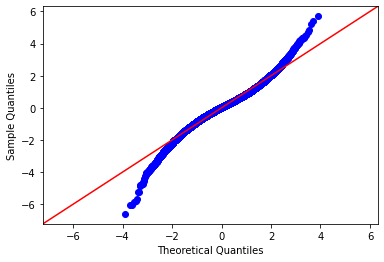

In [107]:
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line='45', fit=True)

From the modelling done, the best model to use is model five. This is because the observation model has an 84% variance that explains all features relevant
 

## 5. Interpretation

In [108]:
models = ['baseline_model']
for i in range(2,6):
    models.append( 'model_'+str(i))
    
for myobject in models:
    # add myobject to list called locus
    # e.g. if locus == "A", add to list "A", if locus == "B" add to list B etc.
    obj = eval(myobject)
    print('Model {} = {}'.format(myobject, obj.rsquared))

Model baseline_model = 0.6638651681502525
Model model_2 = 0.6223285590887638
Model model_3 = 0.6205660170862817
Model model_4 = 0.6655290610943134
Model model_5 = 0.8363931860489878


In [109]:
#Coefficients.
model_5.params

Intercept   -9.609871e+01
id           1.055026e-12
bedrooms    -2.382557e-02
year_sold    5.111662e-02
age_home    -8.462664e-04
                 ...     
zip_98177    6.227917e-01
zip_98178    1.210388e-01
zip_98188    8.499070e-02
zip_98198    5.326881e-02
zip_98199    9.292400e-01
Length: 82, dtype: float64

## 5. Recommendations

Less is more when it comes to the number of bedrooms. An unit increase in the bedrooms leads to a 2.38% drop in the sale price. To generate higher sale prices, Sunset Real Estate should focus on houses with few bedrooms (1,2 &3).

Increasing the sqft living of a house increases the market price.

You've probably heard it before from Allsopp and Spencer but it indeed is about Location, Location, Location! Location makes all the difference. Some of the Zipcodes that fetch the highest prices in the market include:

zip_98004 - Beaux Arts Village

zip_98040 - Mercer Island

zip_98039 - Medina 

zip_98102 - Seattle 

zip_98105 - Seattle 

zip_98109 - Seattle 

zip_98112 - Seattle

zip_98119 - Seattle

The different parts of seattle seems to be a huge preference for most of the home buyers & renters

Houses in condition 5 will fetch the highest price in the market and View 2 fetches a higher market price compared to view 1.

A ideal house that would fetch the highest price in the market would be approximately 3 bedrooms, in Medina, WA (Zipcode 98039) with view 2 and in condition 5 and a high sqft living.

Sunset should also consider a further analysis on the demographic and purchasing power of the people of King County to understand their buying potential. This would advice if it is best to sell higher priced houses or sell cheaper ones but many.  

A major opportunity would be to find home which falls into the lower conditions category and possibly renovate them in order to change the condition to the middle to higher categories in order to to increase the estimated sales price.

Considering a persona canvas with the support of the blog https://www.mckissock.com/blog/real-estate/who-are-millennials-home-ownership/ of someone living in the county, with the preference for lesser bedrooms and newer homes, it screams a young demographic, bachelors and families starting out. Another consideration would be the distance to the top companies in the county to determine if it could be the cause for people settling in specific zipcodes. 

## 6. Conclusion

We performed a multiple linear regression in iterative manner in order to determiine significant factors of determining sales price of homes in King's County, WA. 

A significant model was found to explain 84% of the variance in the data we analyzed of the 19000+ rows of home sales data.

The model was able to best advice an ideal factors for houses that would fetch the highest prices in the market.

This then advices Sunset Real Estate on the best houses to invest in and the different strategies to apply for the best results